Step 1: Exploratory Data Analysis (EDA)

Data Inspection

In [190]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
# Load the dataset and inspect the first few rows to understand its structure.
AmazonDF = pd.read_csv('Amazon Sale Report.csv')
print(AmazonDF.head())

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  ...      INR  647.

C:\Users\T\AppData\Local\Temp\ipykernel_15732\3335396256.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  AmazonDF = pd.read_csv('Amazon Sale Report.csv')


In [192]:
# Check the data types of each column.
AmazonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [193]:
# Identify any potential issues.
# drop Irrelevant columns
AmazonDF = AmazonDF.drop(["Unnamed: 22"], axis=1)

# rename Qty to Quantity
AmazonDF.rename(columns = {'Qty':'Quantity'}, inplace = True)

In [194]:
# Correct data types
# Convert the 'Date' column to a datetime object.
AmazonDF["Date"] = pd.to_datetime(AmazonDF["Date"])

# Convert these columns to categorical data type to save memory and get better performance.
cols = ['Status', 'Fulfilment', 'ship-service-level', 
    'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 
    'currency', 'ship-city', 'ship-state', 'ship-country', 
    'promotion-ids', 'fulfilled-by']

for col in cols:
        AmazonDF[col] = AmazonDF[col].astype('category')

C:\Users\T\AppData\Local\Temp\ipykernel_15732\2610665235.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  AmazonDF["Date"] = pd.to_datetime(AmazonDF["Date"])


In [195]:
AmazonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Order ID            128975 non-null  object        
 2   Date                128975 non-null  datetime64[ns]
 3   Status              128975 non-null  category      
 4   Fulfilment          128975 non-null  category      
 5   Sales Channel       128975 non-null  object        
 6   ship-service-level  128975 non-null  category      
 7   Style               128975 non-null  category      
 8   SKU                 128975 non-null  category      
 9   Category            128975 non-null  category      
 10  Size                128975 non-null  category      
 11  ASIN                128975 non-null  category      
 12  Courier Status      122103 non-null  category      
 13  Quantity            128975 no

Summary Statistics

In [196]:
# Describe the numerical columns
AmazonDF.describe()

,index,Date,Quantity,Amount,ship-postal-code
count,128975.000000,128975,128975.000000,121180.000000,128942.000000
mean,64487.000000,2022-05-12 11:49:27.951928576,0.904431,648.561465,463966.236509
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,32243.500000,2022-04-20 00:00:00,1.000000,449.000000,382421.000000
50%,64487.000000,2022-05-10 00:00:00,1.000000,605.000000,500033.000000
75%,96730.500000,2022-06-04 00:00:00,1.000000,788.000000,600024.000000
max,128974.000000,2022-06-29 00:00:00,15.000000,5584.000000,989898.000000
std,37232.019822,NaN,0.313354,281.211687,191476.764941


In [197]:
# Describe the categorical columns
AmazonDF.describe(include=['object', 'category'])

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,128942,79822,39277
unique,120378,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,1
top,171-5057375-2831560,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship
freq,12,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128942,46100,39277


c:\Users\T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


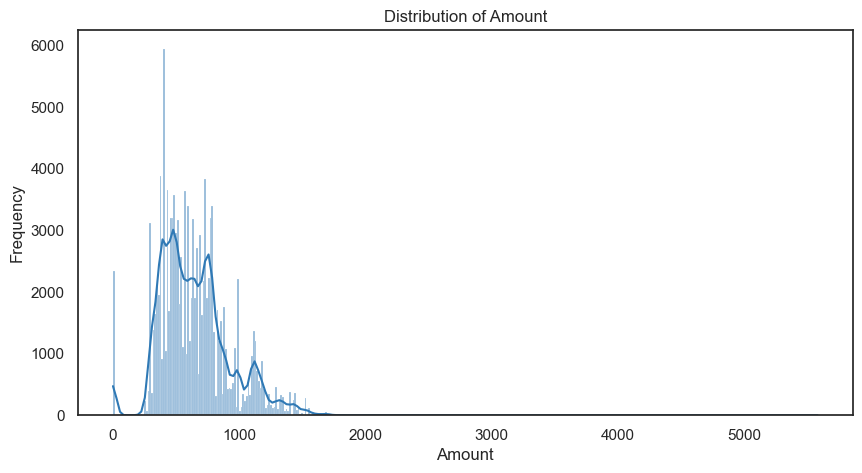

In [198]:
# Visualize the distribution of key features to identify trends and patterns.
# Distribution of Amount 
sns.set_palette("RdBu_r")
plt.figure(figsize=(10,5))
sns.histplot(AmazonDF['Amount'], kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

c:\Users\T\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


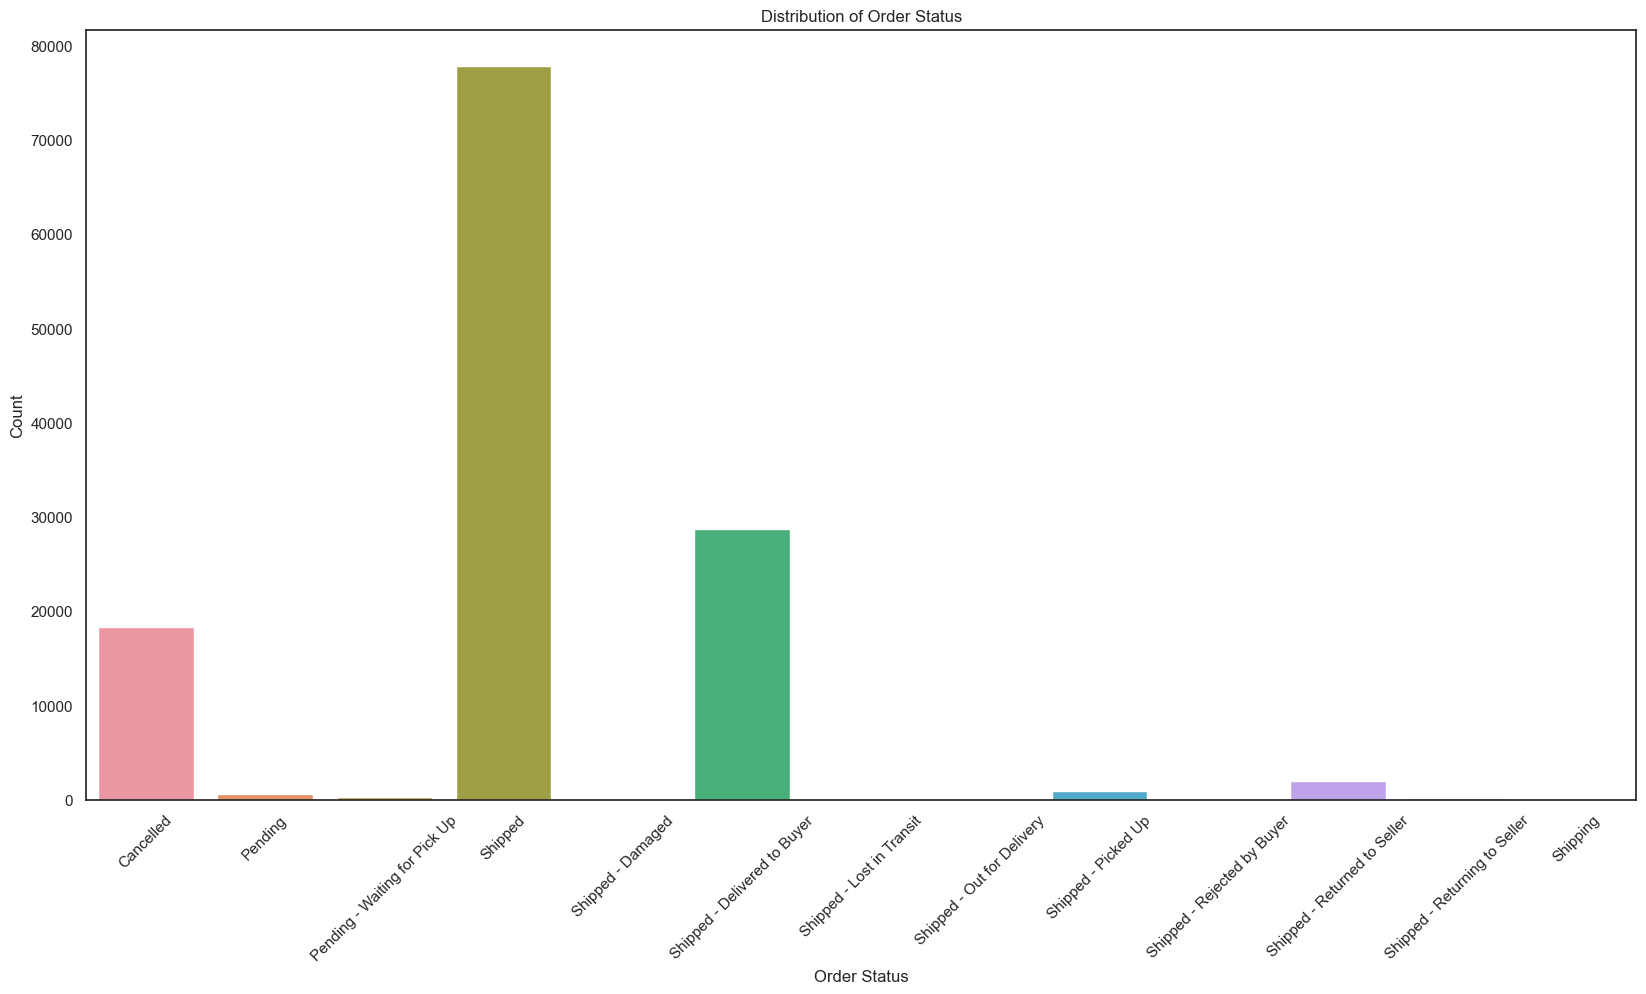

In [199]:
# Distruibution of Order Status
plt.figure(figsize=(20,10))
sns.countplot(x='Status', data=AmazonDF)
plt.xticks(rotation=45)
plt.title('Distribution of Order Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()


c:\Users\T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


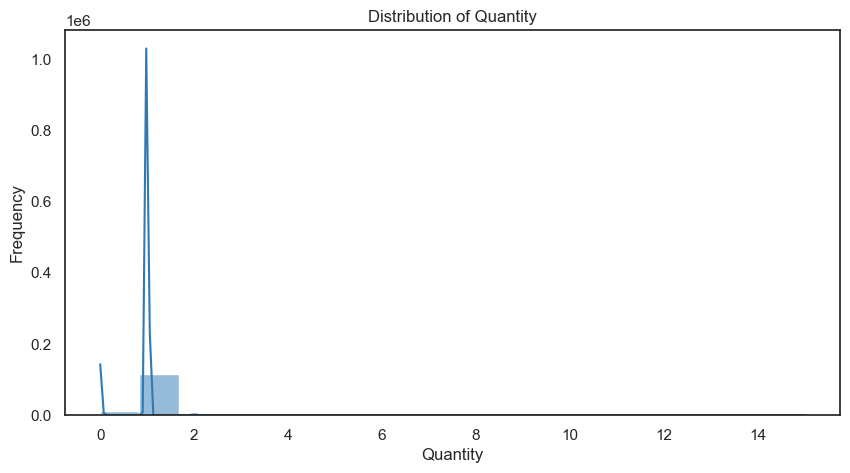

In [200]:
# Distribution of Quantity
plt.figure(figsize=(10,5))
sns.histplot(AmazonDF['Quantity'], kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()